# 加载数据

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [28]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


y
no     39922
yes     5289
Name: count, dtype: int64
Proportion of 'yes': 0.11698480458295547
Proportion of 'no': 0.8830151954170445


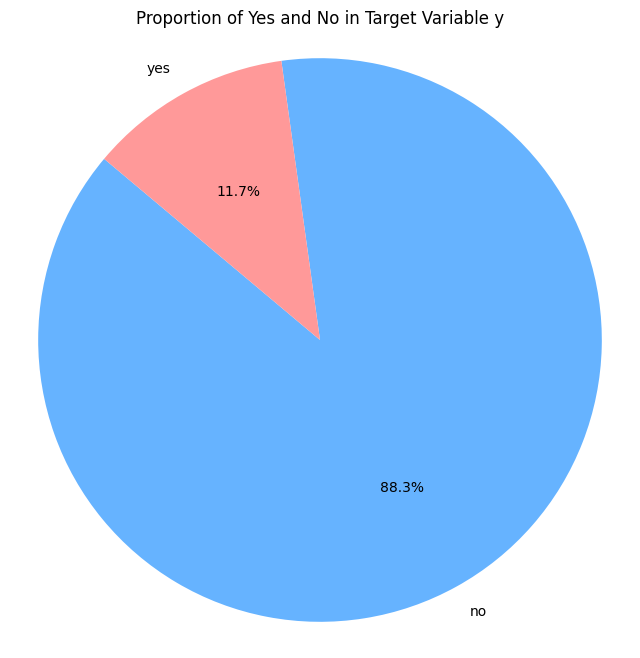

In [29]:
y_counts = df['y'].value_counts()
print(y_counts)
print("Proportion of 'yes':", y_counts['yes'] / len(df))
print("Proportion of 'no':", y_counts['no'] / len(df))
plt.figure(figsize=(8, 8))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Yes and No in Target Variable y')
plt.axis('equal') 
plt.show()

# 处理unkown数据

In [30]:
for col in df.columns:
    if type(df[col][0]) is str:
        print("unknown value count in "+col+" is "+ str(df[df[col]=='unknown']['y'].count()))
#总共四个属性有unkown，其中job和education数量较少，可以用最频繁出现的值补齐，剩下两个太多了直接当做一类属性

unknown value count in job is 288
unknown value count in marital is 0
unknown value count in education is 1857
unknown value count in default is 0
unknown value count in housing is 0
unknown value count in loan is 0
unknown value count in contact is 13020
unknown value count in month is 0
unknown value count in poutcome is 36959
unknown value count in y is 0


In [31]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [32]:
most_common_job_yes = df.loc[df['y'] == 'yes', 'job'].mode()[0]  #更换了替换的方式，使用对应标签里最常用的
most_common_job_no = df.loc[df['y'] == 'no', 'job'].mode()[0]
print(most_common_job_no,most_common_job_yes)

blue-collar management


In [33]:
df.loc[(df['y'] == 'yes') & (df['job'] == 'unknown'), 'job'] = most_common_job_yes
df.loc[(df['y'] == 'no') & (df['job'] == 'unknown'), 'job'] = most_common_job_no
df['job'].value_counts()

job
blue-collar      9986
management       9492
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [34]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [35]:
most_common_education_yes = df.loc[df['y'] == 'yes', 'education'].mode()[0]  #更换了替换的方式，使用对应标签里最常用的
most_common_education_no = df.loc[df['y'] == 'no', 'education'].mode()[0]
print(most_common_education_no,most_common_education_yes)

secondary secondary


In [36]:
df.loc[df["education"]=="unknown","education"]="secondary"#替换education中的unkown
df['education'].value_counts()

education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64

# 处理其他数据

#### 对于二值属性 default、housing、loan，编成0/1

In [37]:
#对于二值属性 default、housing、loan，编成0/1
df.default=df.default.replace({"yes":1,"no":0})
df['default'].value_counts()


default
0    44396
1      815
Name: count, dtype: int64

In [38]:
df.housing=df.housing.replace({"yes":1,"no":0})
df['housing'].value_counts()

housing
1    25130
0    20081
Name: count, dtype: int64

In [39]:
df.loan=df.loan.replace({"yes":1,"no":0})
df['loan'].value_counts()

loan
0    37967
1     7244
Name: count, dtype: int64

In [40]:
df.y=df.y.replace({"yes":1,"no":0})
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

#### 对于有序变量，可以根据顺序编码，如month、education

In [41]:
df['education'].value_counts()

education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64

In [42]:
df.education=df.education.replace({"primary":1,"secondary":2,"tertiary":3})
df['education'].value_counts()

education
2    25059
3    13301
1     6851
Name: count, dtype: int64

In [43]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [44]:
df.month=df.month.replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})
df['month'].value_counts()

month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64

#### 对于无序属性，使用one-hot编码，如job、marital、contact、poutcome

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,2,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,blue-collar,single,2,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [46]:
df=pd.get_dummies(df,columns=['job','marital','contact','poutcome'],dtype=int)


In [47]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,2,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,2,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


In [48]:
df.info() #最终数据，有34个属性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  y                  45211 non-null  int64
 13  job_admin.         45211 non-null  int32
 14  job_blue-collar    45211 non-null  int32
 15  job_entrepreneur   45211 non-null  int32
 16  job_housemaid      45211 non-null  int32
 17  job_manageme

In [49]:
# 打印与 y 的相关系数
corr_matrix = df.corr()
corr_with_y = corr_matrix['y'].sort_values(ascending=False)
print(corr_with_y)

y                    1.000000
duration             0.394521
poutcome_success     0.306788
contact_cellular     0.135873
pdays                0.103621
previous             0.093236
job_retired          0.079245
job_student          0.076897
education            0.068633
marital_single       0.063526
balance              0.052838
job_management       0.037948
poutcome_other       0.031955
age                  0.025155
job_unemployed       0.020390
month                0.018717
contact_telephone    0.014042
poutcome_failure     0.009885
job_admin.           0.005637
marital_divorced     0.002772
job_self-employed    0.000855
job_technician      -0.008970
job_housemaid       -0.015195
job_entrepreneur    -0.019662
default             -0.022419
job_services        -0.027864
day                 -0.028348
marital_married     -0.060260
loan                -0.068185
campaign            -0.073172
job_blue-collar     -0.076346
housing             -0.139173
contact_unknown     -0.150935
poutcome_u

In [50]:
import pandas as pd
from sklearn.model_selection import KFold
# 相关度最高的10个特征(正负各5个)
features = ['duration', 'poutcome_success', 'contact_cellular', 'poutcome_unknown', 
            'contact_unknown', 'housing', 'pdays', 'job_blue-collar', 'previous', 
            'campaign']
# 6、8、10个数量的特征：正负相关度前3、4、5
feature_sets = {
    '6_features': features[:6],
    '8_features': features[:8],
    '10_features': features
}
# 初始化5折交叉验证对象
kf = KFold(n_splits=5, shuffle=True, random_state=42)#一定不要改这里，这里保证划分的数据每次都是相同的，每人使用的数据是一样的
# 用于存储不同特征集的交叉验证数据
five_fold_data = {
    '6_features': {'train': [], 'test': []},
    '8_features': {'train': [], 'test': []},
    '10_features': {'train': [], 'test': []}
}

for name, feature_set in feature_sets.items():
    selected_features = ['y'] + feature_set
    df_selected = df[selected_features]
    x = df_selected.drop('y', axis=1)
    y = df_selected['y']
    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # 保存训练集和测试集
        five_fold_data[name]['train'].append((x_train, y_train))
        five_fold_data[name]['test'].append((x_test, y_test))



KeyError: "['pdays '] not in index"

In [ ]:
#提取数据示例,提取5个特征的一折训练数据
x_train_fold1_5feature, y_train_fold1_5feature = five_fold_data['6_features']['train'][0]
print(x_train_fold1_5feature,y_train_fold1_5feature)

       duration  poutcome_success  contact_cellular  pdays  previous
0           261                 0                 0     -1         0
2            76                 0                 0     -1         0
3            92                 0                 0     -1         0
5           139                 0                 0     -1         0
6           217                 0                 0     -1         0
...         ...               ...               ...    ...       ...
45206       977                 0                 1     -1         0
45207       456                 0                 1     -1         0
45208      1127                 1                 1    184         3
45209       508                 0                 0     -1         0
45210       361                 0                 1    188        11

[36168 rows x 5 columns] 0        0
2        0
3        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 36168, d

In [ ]:
#提取数据示例,提取5个特征的一折测试数据
x_test_fold1_5feature, y_test_fold1_5feature = five_fold_data['6_features']['test'][0]
print(x_test_fold1_5feature,y_test_fold1_5feature)

       duration  poutcome_success  contact_cellular  pdays  previous
1           151                 0                 0     -1         0
4           198                 0                 0     -1         0
7           380                 0                 0     -1         0
13           71                 0                 0     -1         0
23          342                 0                 0     -1         0
...         ...               ...               ...    ...       ...
45181        74                 0                 1    118         3
45191       262                 0                 1    183         1
45200      1556                 0                 1     -1         0
45203       266                 0                 1     -1         0
45204       300                 0                 1     40         8

[9043 rows x 5 columns] 1        0
4        0
7        0
13       0
23       0
        ..
45181    0
45191    1
45200    1
45203    1
45204    1
Name: y, Length: 9043, dty